# 01 Image Preprocessing - PART 03 - PREPARATION

### Imports

In [1]:
import os
import gc
import pickle
import numpy as np
import matplotlib.pyplot as plt
import cv2
import random
from sys import getsizeof
from tensorflow import keras

### Mode of running

In [2]:
TEST_MODE = False

### Paths

In [3]:
BASE_PATH = './data'
ORIGINAL_IMAGES = f'{BASE_PATH}/unsplit'
IMAGE_PICKLES = f'{BASE_PATH}/pickles'
IMAGE_NPYS = f'{BASE_PATH}/npys'

In [4]:
CATEGORIES = os.listdir(ORIGINAL_IMAGES) # list the names of the categories that in my data
print(str(len(CATEGORIES)),'CATEGORIES are ', CATEGORIES)

8 CATEGORIES are  ['Black_Hooded_Oriole', 'Common_Myna', 'Indian_Peafowl', 'Intermediate_Egret', 'Other', 'Red_Faced_Malkoha', 'Rose_Ringed_Parakeet', 'White_Throated_Kingfisher']


### Reading the augmented images

In [5]:
def read_images():
    dataset = []
    
    for category in CATEGORIES:
        cat_path = os.path.join(ORIGINAL_IMAGES, category)
        cat_num = CATEGORIES.index(category)
        for img_filename in os.listdir(cat_path):
            img = cv2.imread(os.path.join(cat_path, img_filename))[...,::-1]  # read & convert from BGR to RGB
            dataset.append([img, cat_num])
        if TEST_MODE and cat_num == 2:
            break # - then will only take the images from the first category
            
    return dataset

In [6]:
dataset = read_images()
len(dataset)

2836

In [7]:
dataset[0][0].shape

(320, 400, 3)

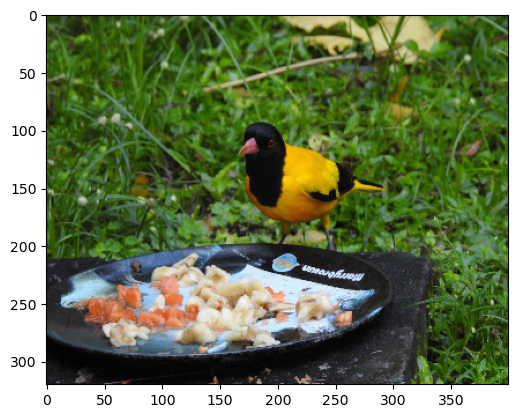

In [8]:
plt.imshow(dataset[0][0][:,:])

In [9]:
# Image pickle save and load functions

def save_batch(batch, i):
    with open(os.path.join(IMAGE_PICKLES, f'img_batch_{i}.pkl'), 'wb') as f:  # open a text file
        pickle.dump(batch, f) # serialize the list
    
def load_batch(i):
    with open(os.path.join(IMAGE_PICKLES, f'img_batch_{i}.pkl'), 'rb') as f:
        return pickle.load(f) # deserialize using load()    

In [10]:
# with open(os.path.join(IMAGE_PICKLES, "hi.pkl"), 'wb') as f:  # open a text file
#     pickle.dump('hi', f) # serialize the list
# f.close()

In [11]:
# with open(os.path.join(IMAGE_PICKLES, "hi.pkl"), 'rb') as f:
#     student_names_loaded = pickle.load(f) # deserialize using load()
#     print(student_names_loaded) # print student names

### Saving images in batches for rescaling
#### Batch-wise approach taken due to memory errors - Not enough RAM

In [ ]:
mem_err_avoid_batch_size = 100

batch_count = int(np.ceil(len(dataset)/mem_err_avoid_batch_size))  # max_iterations

#### Saving the batches

In [ ]:
for itr in range(batch_count):
    start = itr*mem_err_avoid_batch_size
    end = np.min([(itr+1)*mem_err_avoid_batch_size, len(dataset)])
#     print(start, end)
#     print(dataset[start:end])
    save_batch(dataset[start:end], itr)

#### Reading a batch, rescaling, and saving again

In [ ]:
for itr in range(batch_count):
    start = itr*mem_err_avoid_batch_size
    end = np.min([(itr+1)*mem_err_avoid_batch_size, len(dataset)])
#     print(start, end)
#     print(dataset[start:end])
    batch = load_batch(itr)
    
    for i in range(mem_err_avoid_batch_size):
        batch[i][0] = batch[i][0] / 255.
        
    save_batch(batch, itr)
    
    del batch
    gc.collect()

In [ ]:
scaled_dataset = []

for itr in range(batch_count):
    
    scaled_batch = load_batch(itr)
    print(f'{itr} batch loaded')
    
    for k in range(mem_err_avoid_batch_size):
        scaled_dataset.append(scaled_batch[k])
        
    del scaled_batch
    gc.collect()
    
    if TEST_MODE and itr == 2:
        break

In [ ]:
len(scaled_dataset)

In [ ]:
def save_npy(batch, i, X=True):
    np.save(os.path.join(IMAGE_NPYS, f"img_batch_{i}_{'x' if X else 'y'}"), batch)
    
def load_npy(i, X=True):
    return np.load(os.path.join(IMAGE_NPYS, f"img_batch_{i}_{'x' if X else 'y'}.npy"))

In [ ]:
for itr in range(2):
    
    scaled_batch = load_batch(itr)
    print(f'{itr} batch loaded')
    
    scaled_batch_X = np.asarray([scaled_tuple[0] for scaled_tuple in scaled_batch])
    save_npy(scaled_batch_X, itr)
    
    scaled_batch_y = np.asarray([scaled_tuple[1] for scaled_tuple in scaled_batch])
    save_npy(scaled_batch_y, itr, X=False)
    
    del scaled_batch
    del scaled_batch_X
    del scaled_batch_y
    gc.collect()
       
#     if TEST_MODE and itr == 2:
#         break

In [ ]:
len(scaled_dataset)

In [ ]:
scaled_dataset = []

for aug_data in aug_dataset:
    resized_aug_dataset.append(aug_data[0]/255.)

In [ ]:
resized_aug_dataset

In [ ]:
plt.imshow(aug_dataset[0][0])

In [ ]:
random.shuffle(training_data)

In [ ]:
imgs = []
for i in range(100):
    x = np.random.random((1000,1000)) / 255.
    imgs.append(x)
    
save_npy(imgs, 400)

In [ ]:
ix = np.asarray(imgs)
ix.shape

save_npy(ix, 500)

In [ ]:
xxx = load_npy(0)
xxx.shape

In [ ]:
plt.imshow(xxx[0])